# Proyek Analisis Data: Bike Sharing
- **Nama:** Fildzah Khalishah Ghassani
- **Email:** m206d4kx2244@bangkit.academy
- **ID Dicoding:** fildzahkhls

## Menentukan Pertanyaan Bisnis

- Bagaimana pola jumlah peminjaman sepeda pada setiap jam dalam satu hari?
- Apakah terdapat tren jangka panjang dalam jumlah total peminjaman sepeda dari waktu ke waktu?
- Bagaimana korelasi antara musim dan jumlah penyewaan sepeda harian, pada musim apakah peminjam terbanyak?

## Import Semua Packages/Library yang Digunakan

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

Membuat data frame yang diberi nama hour dan day

In [47]:
hour = pd.read_csv("/content/hour.csv")
print(hour.shape)
hour.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [48]:
day = pd.read_csv("/content/day.csv")
print(day.shape)
day.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Mengecek tipe data dari data frame hour dan day

In [49]:
print('\n', hour.info())
print('\n', day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

 None
<class 'pandas.core.frame.DataFrame'>
Rang

Terdapat beberapa kolom yang **tidak sesuai dengan tipe datanya** seperti pada data frame hour **dteday, yr, mnth, hr** dan pada data frame day ada  **dteday, yr, mnth**

In [50]:
print('\nInfo data null hour data frame:\n', hour.isna().sum())
print('\nInfo data null day data frame:\n', day.isna().sum())


Info data null hour data frame:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Info data null day data frame:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


tidak terdapat data null atau kosong pada kedua data frame

In [51]:
print('\nInfo data duplikat hour data frame:\n', hour.duplicated().sum())
print('\nInfo data duplikat day data frame:\n', day.duplicated().sum())


Info data duplikat hour data frame:
 0

Info data duplikat day data frame:
 0


tidak terdapat data duplikat pada kedua data frame

In [52]:
print('\nData describe hour data frame:\n', hour.describe(include='all'))
print('\nData describe day data frame:\n', day.describe(include='all'))


Data describe hour data frame:
            instant      dteday        season            yr          mnth  \
count   17379.0000       17379  17379.000000  17379.000000  17379.000000   
unique         NaN         731           NaN           NaN           NaN   
top            NaN  2011-01-01           NaN           NaN           NaN   
freq           NaN          24           NaN           NaN           NaN   
mean     8690.0000         NaN      2.501640      0.502561      6.537775   
std      5017.0295         NaN      1.106918      0.500008      3.438776   
min         1.0000         NaN      1.000000      0.000000      1.000000   
25%      4345.5000         NaN      2.000000      0.000000      4.000000   
50%      8690.0000         NaN      3.000000      1.000000      7.000000   
75%     13034.5000         NaN      3.000000      1.000000     10.000000   
max     17379.0000         NaN      4.000000      1.000000     12.000000   

                  hr       holiday       weekday    wo

### Cleaning Data

**Tidak ada yang perlu dihapus/drop karna data set sudah bersih tidak ada data yang duplikat maupun null**

mengubah tipe data dteday, yr, mnth, hr dari objek menjadi datetime dari data frame hour

In [65]:
hour_col = ["dteday", "yr", "mnth", "hr"]

In [66]:
hour[hour_col] = hour[hour_col].apply(pd.to_datetime)

mengubah tipe data dteday, yr, mnth dari objek menjadi datetime dari data frame day

In [67]:
day_col = ["dteday", "yr", "mnth"]

In [68]:
day[day_col] = day[day_col].apply(pd.to_datetime)

## Exploratory Data Analysis (EDA)

### Explore ...

Menghitung jumlah total peminjaman sepeda per bulan dengan mengelompokkan data berdasarkan tanggal dengan frekuensi bulanan dan dengan memilih kolom cnt untuk menghitung jumlahnya tiap bulan

In [57]:
monthly_total_rentals = hour.groupby(pd.Grouper(key='dteday', freq='M'))['cnt'].sum()

Menghitung jumlah peminjaman sepeda untuk setiap jam dalam satu hari dengan mengelompokkan data dari DataFrame hour berdasarkan jam dan menghitung rata-rata jumlah peminjaman sepeda untuk setiap jam dalam satu hari

In [58]:
hourly_rentals = hour.groupby('hr')['cnt'].mean()

Menghitung jumlah peminjaman pada setiap musim dengan mengelompokkan data dari DataFrame hour berdasarkan musim dan menghitung rata-rata jumlah peminjaman sepeda untuk setiap musim.

In [59]:
seasonal_rentals = hour.groupby('season')['cnt'].mean()

In [72]:
print(hour.head())

   instant     dteday  season         yr                          mnth  \
0        1 2011-01-01       1 1970-01-01 1970-01-01 00:00:00.000000001   
1        2 2011-01-01       1 1970-01-01 1970-01-01 00:00:00.000000001   
2        3 2011-01-01       1 1970-01-01 1970-01-01 00:00:00.000000001   
3        4 2011-01-01       1 1970-01-01 1970-01-01 00:00:00.000000001   
4        5 2011-01-01       1 1970-01-01 1970-01-01 00:00:00.000000001   

                             hr  holiday  weekday  workingday  weathersit  \
0 1970-01-01 00:00:00.000000000        0        6           0           1   
1 1970-01-01 00:00:00.000000001        0        6           0           1   
2 1970-01-01 00:00:00.000000002        0        6           0           1   
3 1970-01-01 00:00:00.000000003        0        6           0           1   
4 1970-01-01 00:00:00.000000004        0        6           0           1   

   temp   atemp   hum  windspeed  casual  registered  cnt  
0  0.24  0.2879  0.81        0.0

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana pola jumlah peminjaman sepeda pada setiap jam dalam satu hari?

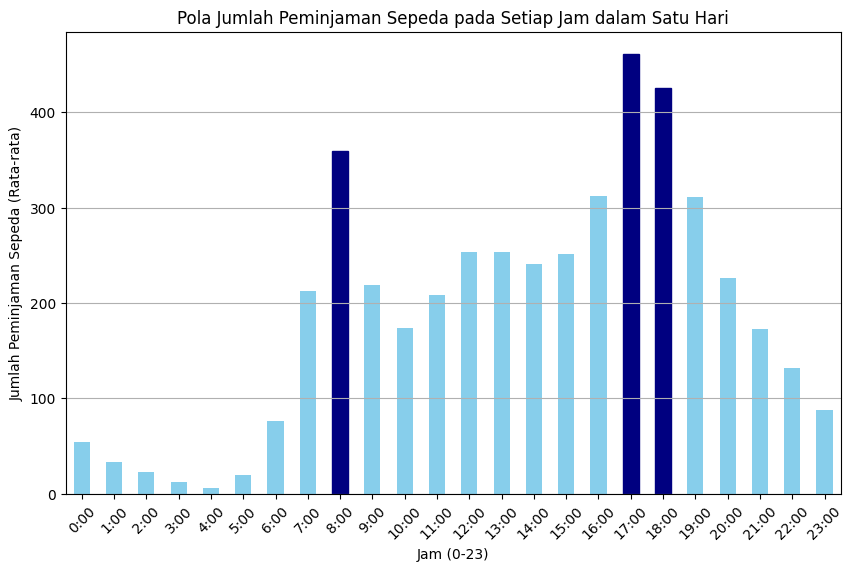

In [73]:
plt.figure(figsize=(10, 6))

hourly_rentals.plot(kind='bar', color='skyblue')

top_3_hours = hourly_rentals.nlargest(3).index
hour_indices = [hourly_rentals.index.get_loc(hour) for hour in top_3_hours]
for i in hour_indices:
    plt.gca().get_children()[i].set_color('navy')

plt.title('Pola Jumlah Peminjaman Sepeda pada Setiap Jam dalam Satu Hari')
plt.xlabel('Jam (0-23)')
plt.ylabel('Jumlah Peminjaman Sepeda (Rata-rata)')
plt.xticks(range(24), labels=[f'{hour}:00' for hour in range(24)], rotation=45)  # Mengatur label sumbu x
plt.grid(axis='y')

plt.show()


Dari hasil visualisasi diatas, dapat diketahui bahwa peminjaman sepeda paling sering terjadi pada **pagi hari yaitu jam 8 dan sore hari dijam 5 dan jam 6**

### Pertanyaan 2: Apakah terdapat tren jangka panjang dalam jumlah total peminjaman sepeda dari waktu ke waktu?

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_total_rentals.index, monthly_total_rentals.values, marker='o', linestyle='-')
plt.title('Total Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Peminjaman Sepeda')
plt.grid(True)
plt.show()

Dari hasil visualisasi di atas, terlihat bahwa peminjaman sepeda mencapai **puncaknya antara bulan 7 dan 10 2012**. Sedangkan **peningkatan tertinggi terjadi antara bulan 3 dan 4 2012**, dan **penurunan tertinggi terjadi antara bulan 10 dan bulan 11 2012**.

### Pertanyaan 3: Bagaimana korelasi antara musim dan jumlah penyewaan sepeda harian, pada musim apakah peminjam terbanyak?

In [ ]:
plt.figure(figsize=(8, 6))
seasonal_rentals.plot(kind='bar', color='skyblue')
plt.title('Korelasi antara Musim dan Jumlah Penyewaan Sepeda Harian')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda Harian (Rata-rata)')
plt.xticks(range(4), labels=['Spring', 'Summer', 'Fall', 'Winter'], rotation=45)
plt.grid(axis='y')
plt.show()


Dari hasil visualisasi diatas, dapat diketahui bahwa peminjaman sepeda paling tinggi terjadi pada musim gugur, diikuti dengan musim panas, musim dingin, dan musim semi.

## Conclusion

- Kesimpulan dari pertanyaan 1 yaitu, pola peminjaman sepeda menunjukkan adanya tren yang konsisten sepanjang hari. **Puncak peminjaman terjadi pada sore hari sekitar jam 5 dan 6**, yang kemungkinan disebabkan oleh pulangnya orang-orang dari tempat kerja atau sekolah dan menggunakan sepeda untuk rekreasi atau kegiatan lainnya. Sedangkan peminjaman tertinggi selanjutnya terjadi pada pagi hari sekitar jam 8, yang mungkin karena banyaknya orang yang menggunakan sepeda sebagai sarana transportasi untuk berangkat ke tempat kerja atau sekolah. Selain itu, terdapat** penurunan jumlah peminjaman pada jam 12 malam hingga sekitar jam 7 pagi**, serta pada malam hari. Pola ini berulang setiap hari, menunjukkan bahwa pola peminjaman sepeda pada setiap jam dalam satu hari relatif konsisten dan dapat diandalkan.
- Kesimpulan pertanyaan 2 yaitu, terdapat tren jangka panjang dalam jumlah total peminjaman sepeda dari waktu ke waktu. Peminjaman sepeda mencapai puncaknya antara bulan Juli dan Oktober 2012. Peningkatan tertinggi dalam jumlah peminjaman terjadi antara bulan Maret dan April 2012, menunjukkan adanya peningkatan signifikan dalam minat masyarakat untuk menggunakan layanan peminjaman sepeda pada periode tersebut. Namun, terdapat penurunan tertinggi dalam jumlah peminjaman antara bulan Oktober dan November 2012, yang mungkin disebabkan oleh faktor-faktor musiman atau perubahan tren dalam preferensi transportasi. Ini menunjukkan bahwa meskipun terdapat fluktuasi dalam jumlah peminjaman sepeda dari waktu ke waktu, tren jangka panjang menunjukkan adanya periode tertentu di mana minat masyarakat dalam menggunakan layanan peminjaman sepeda lebih tinggi daripada periode lainnya.
- Kesimpulan pertanyaan 3 yaitu, Peminjaman sepeda paling tinggi terjadi pada musim gugur, yang kemungkinan disebabkan oleh cuaca yang lebih sejuk dan kondisi yang lebih nyaman untuk bersepeda. Diikuti oleh musim panas, dimana cuaca yang cerah dan hangat membuat orang lebih cenderung untuk beraktivitas di luar ruangan, termasuk bersepeda. Selanjutnya, jumlah penyewaan sepeda pada musim dingin menunjukkan penurunan, mungkin karena cuaca yang lebih dingin dan kurangnya preferensi untuk bersepeda di musim tersebut. Sedangkan pada musim semi, jumlah penyewaan sepeda berada di antara musim gugur dan musim panas. Oleh karena itu, dapat disimpulkan bahwa peminjaman sepeda cenderung tertinggi pada musim gugur, diikuti oleh musim panas, musim semi, dan musim dingin.